# 1.  Introduction

The control of thermal and humidity conditions is essential to ensure passenger comfort and safety in enclosed environments. This project aims to analyze the air conditioning system of the Airbus A350, a modern long-haul commercial aircraft, focusing on its components, operating principles, and thermal performance.

Subsequently, the aircraft’s air conditioning system will be compared to a traditional HVAC system used in buildings, highlighting the main differences in design, operation, and constraints.

Studying air conditioning systems in aircraft is particularly important because of the unique environmental and operational challenges involved:
- The cabin is a pressurized and confined space, operating at high altitudes where external temperatures and pressures are extreme.
- Unlike buildings, aircraft must minimize weight, energy consumption, and system complexity, while ensuring strict safety and reliability standards.
- Cabin air systems must also manage fresh air supply, air recirculation, filtration (including HEPA), humidity control, and pressure regulation, all in real time during flight.

Understanding how these systems are engineered and optimized provides valuable insights for both aerospace and HVAC engineers, and allows for interdisciplinary comparisons that can inspire innovation in both fields.

---

###  Notebook Structure

The notebook is organized as follows:

1. **Introduction** – Objectives, context, and relevance of the study.  

2. **Description of systems** – Overview of air conditioning systems in aircraft and buildings, with a comparative analysis.  
  -2.1 *Aircraft Air Conditioning System*  
  -2.2 *Airconditioning in Building (HVAC system)*  
  -2.3 *Differences between the two systems*

3. **Technical Modelling** – A data-driven example of an A350 ECS (Environmental Control System), including calculations and assumptions.  
  -3.1 *Analysis of the Bootstrap Cycle in the A350-900*  
  -3.2 *Power Analysis of the ACM*  
  -3.3 *Design assumptions*

4. **Discussion and conclusions** – Interpretation of results and summary of key findings.  

5. **References** – Bibliography and sources used. 

# 2. Description of systems

## 2.1  Aircraft Air Conditioning System

Air conditioning in modern commercial aircraft is part of a broader system known as the **Environmental Control System (ECS)**, which is responsible for maintaining acceptable levels of temperature, pressure, humidity and air quality in the cabin.

Unlike in buildings, where air is simply drawn from the environment, filtered and conditioned, in aircrafts the process is far more complex due to the extreme conditions encountered at cruising altitude, where both temperature and pressure are very low. In addition to thermal comfort, the ECS plays a critical role in passenger safety, as it continuously renews and filters the air to eliminate contaminants and maintain appropriate oxygen levels.  These tasks must be performed continuously and reliably under rapidly changing flight conditions, including take-off, cruising at high altitude and descent.

To meet these requirements, the ECS is composed of several interconnected subsystems, each with a specific function in the air processing chain.



---

###  Source of Air: Bleed Air
The process of supplying conditioned air to the cabin begins with the extraction of bleed air from the aircraft’s engines, so the external air serves as the primary source for the ECS.
Bleed air is drawn from the intermediate stages of the engine's high-pressure compressor, typically at a pressure of 2.5 to 4 bar and temperatures ranging from 150°C to 250°C. This air is sterile, dry and has already undergone significant compression, making it suitable for environmental control applications. The extraction is controlled via pressure regulating and shutoff valves to ensure system safety and performance. Once extracted, the air is routed into the pneumatic manifold and directed toward the air conditioning packs, where it undergoes thermodynamic processing before being delivered to the cabin.

In more recent aircraft designs, such as the Boeing 787, a bleedless architecture has been adopted. In this configuration, engine bleed ports are eliminated entirely, and the ECS receives air from electrically driven compressors, which are powered by the aircraft’s electrical system. This approach improves overall fuel efficiency and reduces engine complexity, as it decouples environmental control from the propulsion system.

---

###  Main Components and functionality of the ECS

<div style="text-align: center;">
  <img src="ACM_plant.png" alt="ECS components" style="width: 60%;"/>
</div>

#### 1. **Pre-cooler**
The hot, high-pressure bleed air first enters the pre-cooler, where it is cooled by ambient air drawn from outside the aircraft, called ram air. This initial cooling step reduces the air temperature while keeping the pressure almost constant. The process is an isenthalpic heat exchange without work being performed. The cooled air is then routed to other systems that require pressurized air, including environmental control and de-icing functions throughout the aircraft.

#### 2. **Primary heat enchanger**
The first heat exchanger of the Air Cycle Machine (ACM) has the same function of the pre-cooler, so it further cools the bleed air. The only difference is that the air is used just for the ECS. Since the pre-cooler and the primary heat exchanger serve a similar purpose, it is possible for a single heat exchanger to fulfill both functions in some system configurations.

#### 3. **Compressor**
The partially cooled air then enters the compressor stage of the Air Cycle Machine (ACM). This compression step increases the pressure and temperature of the air. Although this seems counterintuitive, it is necessary to enable effective cooling in the next stage.

#### 4. **Secondary Heat Exchanger**
After compression, the air passes through a secondary heat exchanger, where it is again cooled using ram air. Because the air is at a higher temperature after compression, this stage is more effective at removing heat, preparing the air for expansion.

#### 5. **Turbine**
The cooled, high-pressure air is then expanded through a turbine, where it undergoes a rapid pressure drop and temperature drop. This expansion performs useful work, often used to drive the ACM’s compressor. The expansion is ideally isentropic and results in a significant cooling effect.

#### 6. **Water Separator (Condenser)**
As the air temperature drops, it may reach or fall below the dew point, causing moisture to condense. This moisture is removed using a water extractor or separator, which typically relies on centrifugal action to eliminate water particles. This step ensures that dry air is delivered to the cabin, preventing fog and humidity-related discomfort.

#### 7. **Mixing Unit**
After passing through the air conditioning packs and the water separator, the processed air reaches the mixing unit, where it is blended with recirculated cabin air before distribution. This unit plays a key role in optimizing energy efficiency and maintaining cabin comfort. Instead of relying solely on freshly conditioned air, which would significantly increase the system's energy demand, the ECS reuses a portion of cabin air that has already been partially conditioned. This recirculated air is passed through HEPA filters, capable of removing more than 99% of bacteria, viruses and particulate matter, ensuring that air quality standards are maintained.
The mixing unit is typically a static chamber that receives air from both the packs and the recirculation fans, combining them in approximately a 50:50 ratio.

#### 8. **Cabin Distribution System**

Once mixed, the air is distributed through ducts and nozzles into different zones of the cabin such as cockpit, economy, and business class. This distribution system is designed to allow zonal temperature control, so that different areas of the aircraft can maintain slightly different temperatures based on comfort requirements.


<div style="text-align: center;">
  <img src="dist.png" alt="dis" style="width: 50%;"/>
</div>


---

###  Thermodynamic cycle

The sequence of transformations that occur from the engine compressor up to the Air Cycle Machine (ACM) forms what is known as the bootstrap cycle. This is a modified version of the reverse Brayton cycle, which traditionally consists of a single compression, one cooling stage, and an expansion. In the bootstrap cycle, however, the air undergoes two stages of compression and two cooling stages.

This multi-stage approach improves efficiency because cooler air is easier to compress, requiring less energy in the second compression stage. By removing heat between compressions, the system reduces the overall workload and increases the cooling performance.

- **1 → 2**: Adiabatic compression (engine compressor)  

- **2 → 3**: First heat exchange (pre-cooler and first ACM heat exchanger)  

- **3 → 4**: Adiabatic compression (ACM compressor)  

- **4 → 5**: Second heat exchange (second ACM heat exchanger)
  
- **5 → 6**: Adiabatic expansion (ACM turbine)


<div style="text-align: center;">
  <img src="Ciclo_bootstrap.png" alt="bootstrap" style="width: 60%;"/>
</div>



### Automatic Control and Zonal Regulation

####  Thermal control
In modern aircraft, the Environmental Control System (ECS) relies on a distributed network of sensors and automatic controllers to maintain stable and comfortable environmental conditions throughout the cabin. The regulation process begins at the pack outlets, where sensors monitor the temperature and pressure of the processed air. These measurements are used to modulate the pack control valves, adjusting the amount of hot bleed air or compressed air entering the system and ensuring that properly conditioned air is delivered under varying flight conditions. Then there is a controller for the heat exchanger that controls the quantiy of ram air.

As the air flows through the ducting system, additional sensors track temperature and flow rate before the air reaches the mixing unit. The ECS controller uses this data to regulate mixing valves that determine the ratio of fresh to recirculated air. After mixing, the air is routed to different cabin zones, each equipped with zonal temperature sensors. These provide feedback for the adjustment of trim air valves, which inject small amounts of hot air into specific branches of the ducting to locally fine-tune the temperature. This compensates for variations in thermal load or passenger comfort requirements. Once the air exits the mixing unit, no further active thermal processing is carried out, apart from minor flow control via adjustable air vents. This architecture, based on centralized regulation with localized fine-tuning, ensures both efficiency and operational reliability throughout all flight phases.

<div style="text-align: center;">
  <img src="control1.jpg" alt="ctrl" style="width: 60%;"/>
</div>

#### Cabin Pressurization Control

In parallel with thermal regulation, the ECS manages cabin pressurization, a critical function for passenger safety at high altitudes. This task is performed by the Cabin Pressure Controller (CPC), which continuously monitors cabin altitude, rate of climb or descent, and the pressure differential between the cabin and the external atmosphere. Based on these inputs, the CPC modulates the position of the outflow valve, which governs the rate at which air is released from the pressurized fuselage.

By controlling air outflow, the system maintains a cabin pressure equivalent to an altitude typically between 1800 and 2200 meters, ensuring both physiological comfort and structural integrity. Modern pressurization systems operate in closed-loop configuration and include redundancy to guarantee functionality even in the event of a component failure. This automatic and adaptive control is essential for ensuring smooth transitions during ascent and descent, and for maintaining safe conditions throughout all flight phases.

## 2.2  Air Conditioning in Buildings (HVAC Systems)

In buildings, air conditioning is handled by systems known as HVAC (Heating, Ventilation, and Air Conditioning). These systems aim to ensure thermal comfort and good indoor air quality by controlling temperature, humidity, and air cleanliness across different rooms or zones.

Unlike aircraft, buildings operate at ground level, where the external conditions are less extreme and where the environment is relatively stable. Therefore, HVAC systems do not need to deal with pressurization or rapid variations in temperature and altitude. However, they must still ensure efficient operation, especially in large commercial or public buildings.

A typical HVAC system includes several key components:

- **Filtration**: Removes airborne particles and contaminants to ensure clean air supply and protect internal components.

- **Fan**: Ensures continuous air movement through the AHU, maintaining required airflow and system pressure.

- **Heat Exchanger**: Transfers thermal energy from the exhaust air to the incoming fresh air, improving energy efficiency without mixing air streams.

- **Plenum**: Works as a mixing box where return and fresh air combine before further conditioning.

- **Heating/Cooling coil**: Adjust the air temperature to match comfort or process requirements using thermal exchange media.

- **Humidifier**: Adds moisture to the air to maintain indoor humidity levels, preventing dryness and improving comfort.


<div style="text-align: center;">
  <img src="AHU.jpg" alt="ahu" style="width: 60%;"/>
</div>

Most HVAC systems do not rely purely on fresh air. Instead, a significant portion of the air, typically around 60–80%, is recirculated from inside the building. This is done in order to reduce energy consumption, as recirculated air has already been partially conditioned and requires less energy to bring to the desired temperature and humidity.
Before re-entering the circulation loop, the recirculated air is filtered (usually with high-efficiency filters) and mixed with a fraction of fresh air. This ensures a balance between energy efficiency and indoor air quality. The resulting mixed air is then processed by the AHU and redistributed.

There are two main types of air distribution systems: Constant Air Volume (CAV) and Variable Air Volume (VAV). The key difference is that CAV systems deliver a constant airflow with variable temperature to maintain comfort, while VAV systems vary the airflow rate at a nearly constant temperature to meet the space’s thermal load more efficiently.

## 2.3  Differences between the two systems

In aircraft ECS and in buildings air-based HVAC systems have key technical differences that arise from their distinct operational environments and engineering constraints. ECS sources bleed air from engine compressors or the Auxiliary Power Unit (APU), which enters the system at high pressure and temperature (200–250 °C). These extreme conditions make the air unsuitable for immediate cabin use and require comprehensive treatment in the ACM. Only after this initial processing ,the air is mixed with recirculated cabin air to regulate temperature and humidity. In contrast, building HVAC systems draw ambient air and as a first step mix it with return air after intake, in order to optimize energy efficiency before the combined stream is filtered and thermally conditioned. 

The difference in component design reflects the critical importance of weight and energy consumption in aviation; ECS systems are compact and refrigerant-free, while HVAC units can afford heavier and less energy-constrained setups. Another fundamental divergence is the relative humidity: in aircraft cabins, it is intentionally kept low (typically 5–20%) to prevent condensation and mantain a sterile environment, whereas in buildings it is maintained around 40–60% to support occupant comfort. Similarly, cabin pressurization control is essential in ECS and is actively managed by outflow and safety valves to maintain safe internal pressure at high altitudes, an aspect entirely absent in HVAC systems, which operate at ambient pressure.

At a system level, the redundancy and safety requirements are far more stringent in aviation. ECS typically includes two independent packs and APU backup to ensure continuous operation in all flight phases, while HVAC redundancy is usually optional and implemented only in mission-critical facilities. Finally, both systems prioritize thermal comfort and acoustic performance, but ECS places greater emphasis on low noise levels due to the confined space and sensitivity of passengers during flight, requiring advanced sound insulation and flow regulation strategies.


# 3. Technical modelling

## 3.1 Analysis of the Bootstrap Cycle in the A350-900

This analysis focuses on the bootstrap Environmental Control System (ECS) used in modern commercial aircraft, taking the **Airbus A350-900** as a reference. The A350-900 is equipped with a highly efficient air conditioning system based on a reverse Brayton cycle, also known as a bootstrap cycle. 

The simulation considers International Standard Atmosphere (ISA) conditions at a cruise altitude of 10,700 meters, Mach of 0.85 and provides a detailed thermodynamic analysis of the process across all major points in the cycle.


### Assumptions

- The working fluid is ideal air (perfect gas assumption)

  - Constant specific heat ratio: $k = \frac{c_p}{c_v} = 1.4$

  - Specific gas constant: $R = 287.05287\ \text{J/(kg} \cdot \text{K)}$

- Pressure ratios:  

  - First compressor: $\beta_1 = 7$ 

  - Second (ACM) compressor: $\beta_2 = 1.4$  

  Modern turbofan engines achieve very high overall pressure ratios, often reaching values around 30, thanks to the use of multi-stage axial compressors. However, the air supplied to the Environmental Control System (ECS) is typically extracted from an intermediate stage of the engine compressor, where the pressure ratio is usually between 5 and 10. In contrast, the compressor within the Air Cycle Machine (ACM) is generally of the centrifugal type. Unlike axial compressors, centrifugal compressors are more compact but offer lower pressure ratios, according to literature ranging from 1.3 to 2.


- Isentropic efficiencies:  

  - First compressor: $\eta_c = 0.9$ 

  - Second (ACM) compressor: $\eta_c = 0.8$ 

  - Turbine: $\eta_t = 0.8$

  According to literature, the high efficiency of the main compressor corresponds to the performance of engine-grade components operating in stable cruise conditions. The ACM compressor and turbine, being smaller and integrated into a compact air cycle unit, typically operate at slightly lower efficiencies due to geometrical constraints and internal losses, making 80% a reasonable and conservative estimate for both

- Pressure losses:  

  - After first heat exchanger: $P_3 = 0.9 \cdot P_2$  

  - After second heat exchanger: $P_5 = 0.92 \cdot P_4$

  A pressure drop of approximately 10% is consistent with the typical behavior of crossflow or counterflow heat exchangers, accounting for frictional effects and the complexity of the internal airflow path. In this case, a single heat exchanger model was used to represent both the pre-cooler and the primary heat exchanger, as they perform similar thermodynamic functions. As a result, a slightly higher pressure loss was considered appropriate to capture the combined impact of both components in a simplified yet representative manner.

- Fixed outlet temperatures from heat exchangers:  

  - $T_3 = 400 \ \text{K}$  

  - $T_5 = 380 \ \text{K}$

  Fixed outlet temperatures were assumed after the two heat exchangers to simplify the cycle definition and ensure consistent boundary conditions. A value of 400 K after the first exchanger was chosen to reflect a substantial but feasible reduction from typical bleed air inlet temperatures. After the second exchanger, a temperature of 380 K provides a suitable inlet condition for the turbine, enabling effective energy extraction and cooling while keeping the air above condensation risk levels.
---

### Step 1: Ambient Conditions (Point 1)


Atmospheric pressure and temperature at altitude $h = 10{,}700 \ \text{m}$ are calculated using the International Standard Atmosphere (ISA) model:

$$
T_1^{\text{static}} = T_0 + \lambda h
$$

$$
P_1^{\text{static}} = P_0 \left(1 + \frac{\lambda h}{T_0} \right)^{-\frac{g}{R \lambda}}
$$

Where:

- $\lambda = -0.0065 \ \text{K/m}$: temperature lapse rate  

- $T_0 = 288.15 \ \text{K}$: sea level standard temperature  

- $P_0 = 101325 \ \text{Pa}$: sea level standard pressure  

- $g = 9.81 \ \text{m/s}^2$: gravitational acceleration  

- $R = 287.05287\ \text{J/(kg} \cdot \text{K)}$: specific gas constant for air  

Since the aircraft is flying at Mach 0.85, static conditions are converted to total conditions using isentropic flow relations:

$$
T_1 = T_1^{\text{static}} \left(1 + \frac{k - 1}{2} \cdot M^2 \right)
$$

$$
P_1 = P_1^{\text{static}} \left(1 + \frac{k - 1}{2} \cdot M^2 \right)^{\frac{k}{k - 1}}
$$

Where:

- $M = 0.85$: aircraft Mach number  

- $k = 1.4$: specific heat ratio for air  

---

### Step 2: Compression 1 → 2 (First Compressor)

The air undergoes adiabatic compression. The pressure after compression is:

$$
P_2 = \beta_1 \cdot P_1
$$

Where $\beta_1$ is the pressure ratio.
The isentropic outlet temperature is:

$$
T_{2id} = T_1 \cdot \left(\frac{P_2}{P_1}\right)^{\frac{k-1}{k}}
$$

Taking into account the compressor efficiency $\eta_c$, the real outlet temperature becomes:

$$
T_2 = T_1 + \frac{T_{2id} - T_1}{\eta_c}
$$

---

### Step 3: Cooling 2 → 3 (First Heat Exchanger)

After the first compression stage, the air is cooled in a heat exchanger. The pressure drops to:

$$
P_3 = 0.9 \cdot P_2
$$

The temperature at the outlet is assumed fixed:

$$
T_3 = 400 \ \text{K}
$$

---

### Step 4: Compression 3 → 4 (Second Compressor)

A second compression stage follows:

$$
P_4 = \beta_2 \cdot P_3
$$

Where $\beta_2$ is the pressure ratio.
The isentropic outlet temperature is:

$$
T_{4id} = T_3 \cdot \left(\frac{P_4}{P_3}\right)^{\frac{k-1}{k}}
$$

Real outlet temperature considering compressor efficiency:

$$
T_4 = T_3 + \frac{T_{4id} - T_3}{\eta_c}
$$

---

### Step 5: Cooling 4 → 5 (Second Heat Exchanger)

Another cooling process follows:

$$
P_5 = 0.92 \cdot P_4
$$

The outlet temperature is assumed:

$$
T_5 = 380 \ \text{K}
$$

---

### Step 6: Expansion 5 → 6 (Turbine)

The air is expanded in a turbine to a lower pressure corresponding to a lower altitude (e.g. $h_{pres} = 1800 \ \text{m}$). The pressure calculated is:

$$
P_6 = P_0 \cdot \left(1 + \frac{\lambda \cdot h_{pres}}{T_0}\right)^{-\frac{g}{R \lambda}}
$$

The isentropic outlet temperature is:

$$
T_{6id} = T_5 \cdot \left(\frac{P_6}{P_5}\right)^{\frac{k-1}{k}}
$$

Real outlet temperature considering turbine efficiency:

$$
T_6 = T_5 - \eta_t \cdot (T_5 - T_{6id})
$$

---

### Specific Volume for Plotting

To construct the $P\text{-}v$ diagram, the specific volume is calculated for each state using:

$$
v = \frac{R \cdot T}{P}
$$

Where $T$ is the temperature at each point and $P$ is the corresponding pressure.


P1 =  38029.0
T1 =  250.188
P2 =  266203.0
T2 =  456.91
P3 =  239583.0
T3 =  400
P4 =  335416.0
T4 =  450.454
P5 =  308583.0
T5 =  380
P6 =  81483.0
T6 =  283.799


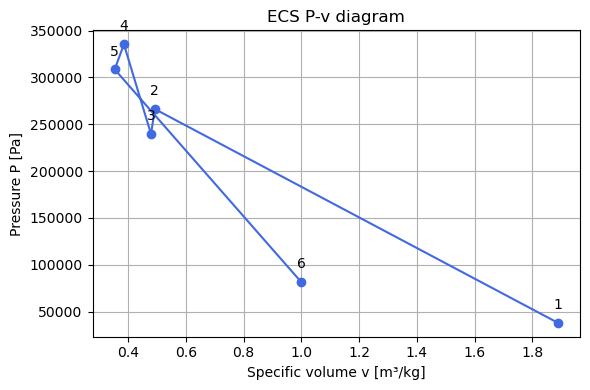

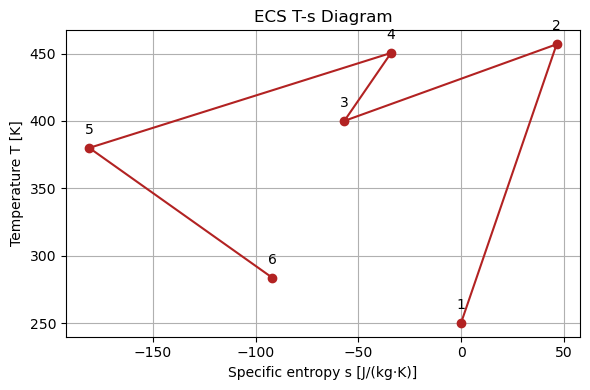

In [ ]:
# data

h = 10700            # altitude [m]
Ma = 0.85            # mach number [-]
P0 = 101325          # standard pressure at sea level [Pa]
T0 = 288.15          # standard temperature at sea level [k]
g = 9.81             # acceleration of gravity [m/s^2]
R = 287.05287        # costant of perfect gas [j/(kg*k)]
lambda_ = -0.0065    # temperature lapse rate [k/m]
k = 1.4              # specific heat ratio [-]
beta_1 = 7           # compression ratio of engine compressor [-]
beta_2 = 1.4         # compression ratio of ACM compressor [-]
eta_c1 = 0.9         # first compressor efficiency [-]
eta_c2 = 0.8         #s econd compressor efficiency [-]
eta_t = 0.8          # turbine efficiency [-]

# external air (ISA)

P1_st = P0 * (1 + (lambda_*h)/T0)**(-g/(R*lambda_)) 
T1_st = T0 + lambda_ * h

P1_tot = P1_st * (1 + (k-1)*(Ma**2)/2)**(k/(k-1))
T1_tot = T1_st * (1 + (k-1)*(Ma**2)/2)

P1 = round(P1_tot, 0)
T1 = round(T1_tot, 3)

print("P1 = ",P1)
print("T1 = ",T1)

# 1 --> 2 engine compressor

P2 = beta_1 * P1
T2_id = T1*(P2/P1)**((k-1)/k)
T2_re = (T2_id-T1)/eta_c1 + T1

P2 = round(P2, 0)
T2 = round(T2_re, 3)

print("P2 = ",P2)
print("T2 = ",T2)

# 2 --> 3 primary heat exchanger ACM

P3 = 0.9*P2
T3 = 400

P3 = round(P3, 0)

print("P3 = ",P3)
print("T3 = ",T3)

# 3 --> 4 ACM compressor

P4 = beta_2*P3
T4_id = T3*(P4/P3)**((k-1)/k)
T4_re = (T4_id-T3)/eta_c2 + T3

P4 = round(P4, 0)
T4 = round(T4_re, 3)

print("P4 = ",P4)
print("T4 = ",T4)

# 4 --> 5 second heat exchanger ACM

P5 = 0.92*P4
T5 = 380

P5 = round(P5, 0)

print("P5 = ",P5)
print("T5 = ",T5)

# 5 --> 6 turbine ACM

P6 = P0 * (1 + (lambda_*1800)/T0)**(-g/(R*lambda_)) 
T6_id = T5 * (P6/P5)**((k-1)/k)
T6_re = T5 - eta_t * (T5-T6_id)

P6 = round(P6, 0)
T6 = round(T6_re, 3)

print("P6 = ",P6)
print("T6 = ",T6)

import numpy as np
import matplotlib.pyplot as plt

# constant
cp = k * R / (k - 1)  # cp air speciific J/(kg·K)

T_vals = np.array([T1, T2, T3, T4, T5, T6])
P_vals = np.array([P1, P2, P3, P4, P5, P6])
labels = ['1', '2', '3', '4', '5', '6']

# specific volume v = R*T/P
v_vals = R * T_vals / P_vals

# specific entropy for each trasformation (J/kg·K)
delta_s = cp * np.log(T_vals[1:] / T_vals[:-1]) - R * np.log(P_vals[1:] / P_vals[:-1])

# cumulative entropy with s1 a arbitrary zero
s_vals = np.zeros(len(T_vals))
s_vals[1:] = np.cumsum(delta_s)

# plot P-v diagram
plt.figure(figsize=(6,4))
plt.plot(v_vals, P_vals, marker='o', linestyle='-', color='royalblue')
for i, label in enumerate(labels):
    plt.annotate(label, (v_vals[i], P_vals[i]), xytext=(0,10), textcoords='offset points', ha='center')
plt.xlabel("Specific volume v [m³/kg]")
plt.ylabel("Pressure P [Pa]")
plt.title("ECS P-v diagram")
plt.grid(True)
plt.tight_layout()
plt.show()

# plot T-s diagram
plt.figure(figsize=(6,4))
plt.plot(s_vals, T_vals, marker='o', color='firebrick')
for i, label in enumerate(labels):
    plt.annotate(label, (s_vals[i], T_vals[i]), xytext=(0,10), textcoords='offset points', ha='center')
plt.xlabel('Specific entropy s [J/(kg·K)]')
plt.ylabel('Temperature T [K]')
plt.title('ECS T-s Diagram')
plt.grid(True)
plt.tight_layout()
plt.show()




## 3.2 Power Analysis of the ACM

To evaluate the power required by the Air Cycle Machine (ACM), we considered the fresh air mass flow per passenger according to typical regulations:
$$ \dot{m}_{\text{fresh, per pax}} = {0.25} \ \text{kg/min} $$

For $N_{\text{pax}} = 324$, the fresh mass flow rate is:

$$
\dot{m}_{\text{fresh}} = \dot{m}_{\text{fresh, per pax}} \cdot N_{\text{pax}}
$$

Using the specific heat of air at constant pressure $c_p = 1005 \ \text{J/(kg} \cdot \text{K)}$ , we calculated the specific work done by each component:

- Compressor specific work:

$$
l_{\text{comp}} = c_p (T_2 - T_1)
$$

- Turbine specific work:

$$
l_{\text{turb}} = c_p (T_5 - T_6)
$$

- ACM specific work:

$$
l_{\text{ACM}} = l_{\text{comp}} - l_{\text{turb}}
$$

The total power required by the ACM is:

$$
\dot{W}_{\text{ACM}} = \dot{m}_{\text{fresh, total}} \cdot l_{\text{ACM}}
$$

Similarly, we compute the individual power contributions:

$$
\dot{W}_{\text{comp}} = \dot{m}_{\text{fresh, total}} \cdot l_{\text{comp}}
$$

$$
\dot{W}_{\text{turb}} = \dot{m}_{\text{fresh, total}} \cdot l_{\text{turb}}
$$

A power balance visualization is shown in the bar chart, highlighting the compressor input and turbine recovery.


power required by ACM:  149.95 kW


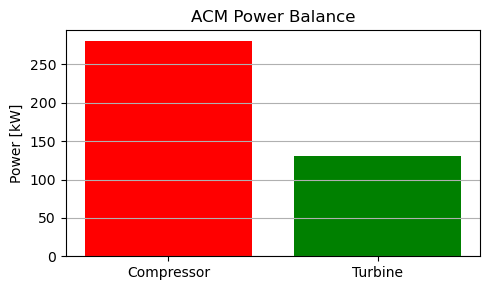

In [ ]:
# data
N_pax = 324  # number of passenger           
cp = 1005    # specific air cp
m_dot_fresh_air_pax = 0.25/60   # regulations [kg/s]

m_dot_fresh_air = m_dot_fresh_air_pax * N_pax  # total fresh air mass flow rate [kg/s]

l_compressor = cp * (T2 - T1)  # specifc work of the compressor
l_turbine = cp * (T5 - T6)  # specific work of the turbine

l_acm = l_compressor - l_turbine  # net specific work of the ACM

W_acm = m_dot_fresh_air * l_acm  # total ACM power required [W]

W_compressor = m_dot_fresh_air * l_compressor # power required by the compressor [W]
W_turbine = m_dot_fresh_air * l_turbine # power generated by the turbine [W]


print("power required by ACM: ", round(W_acm/1000,2), "kW")

plt.figure(figsize=(5,3))
plt.bar(['Compressor', 'Turbine'], [W_compressor/1000, W_turbine/1000], color=['red','green'])
plt.title("ACM Power Balance")
plt.ylabel("Power [kW]")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


## 3.3 Design assumptions 

To model the ECS system from the mixing box onward, the simplified linear function `airplane_ECS_modelling.py` was used. This function is based on a structure similar to HVAC models typically employed in building simulations. It includes a mixing box, followed by a heating coil responsible for raising the air temperature. Next, a vapor humidifier is used to regulate humidity, and finally, a thermal zone representing the aircraft cabin is modeled. To maintain the desired cabin conditions, two independent controllers are implemented: one for temperature control and one for humidity control.

- **Mixing ratio** (`alpha`):  
Typically, during cruise conditions, the mixing box blends fresh bleed air and recirculated cabin air in roughly a 50-50 ratio, with variations ranging from 40-60 to precisely regulate the cabin temperature. This balanced mixing allows for fine control of thermal comfort inside the aircraft cabin.

- **Setpoint and supply air temperature** (`t_s`, `t_i`):  
The cabin temperature setpoint is the target temperature maintained within the cabin environment. It generally ranges between 21°C and 24°C, depending on seasonal and operational conditions. The supply air temperature is intentionally set lower than the cabin setpoint because the cabin tends to warm up due to internal heat gains from passengers and equipment.

- **Setpoint relative humidity** (`phi_i`):  
The cabin relative humidity setpoint is significantly lower than typical ground-level values to maintain a healthier, more sterile environment and to limit microbial growth. Additionally, active humidification systems are usually avoided onboard due to their added weight and power consumption constraints.

- **Turbine outlet air conditions** (`t_turb`, `phi_turb`):  
The air exiting the turbine is extremely dry, with relative humidity typically around 1-5%, because bleed air drawn from the engine compressor stages contains very low moisture content.

- **Sensible Heat Load** (`Q_aux_s`):  
In a fully loaded wide-body aircraft such as the Airbus A350, the total sensible heat load inside the cabin can reach approximately 35 kW, mainly due to passenger presence and onboard systems. Passengers are the primary source, each contributing 75–100 W of sensible heat depending on metabolic activity. With around 300 passengers, this results in a baseline of 25–30 kW from body heat alone. Additional heat comes from LED lighting systems (1–2 W/m²), the in-flight entertainment (IFE) system (8–15 W per passenger), and personal electronic devices. Combined, these can add several kilowatts, especially on long-haul flights. Other contributors, such as cabin fans, electronic modules, actuators, and wireless access points, typically generate between a few hundred watts and over 1 kW. These combined loads require a continuous flow of conditioned air, at temperatures significantly below the cabin setpoint, from the Environmental Control System (ECS) to maintain thermal comfort and ensure thermal stability during cruise.

- **Latent Heat Load** (`Q_aux_l`):  
Latent heat generation in the cabin is mainly due to moisture released by passengers through respiration and transpiration. Each person emits between 40 and 70 grams of water vapor per hour, depending on activity, ambient conditions, and clothing. For 300 passengers, this results in 12–21 kg of moisture per hour, equivalent to a latent heat load of roughly 10 kW. Secondary sources include minor contributions from galley operations (e.g., hot drinks, food warming) and crew activity. Unlike buildings, aircraft do not use active humidification systems, relying instead on the continuous intake of extremely dry air from the ECS to prevent humidity build-up and maintain cabin air quality.

Since the airflow rate is a known parameter, given that the fresh air supply is regulated, and both the mixing ratio and the supply and indoor setpoint temperatures are defined, it is possible to estimate the overall heat transfer coefficient (UA). This can be done by applying the sensible heat balance equation to the thermal zone, thus deriving a realistic value for UA based on energy conservation principles.




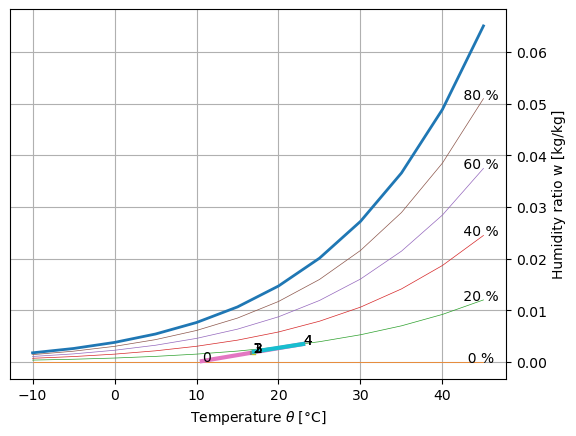


  θ [°C] w [g/kg]
0  10.65     0.16
1  16.82     1.81
2  17.00     1.81
3  17.00     1.99
4  23.00     3.47

   QsHC  QlVH  QsTZ  QlTZ
0  0.47  1.16 16.20 10.00 kW
UA: 242.0


In [ ]:
import airplane_ECS_modelling as ecs

alpha = 0.5             # mixing ratio [-]
t_s = 17                # temperature of supply [°C]
t_i = 23                # temperature of setpoint [°C]
phi_i = 0.2             # relative humidity setpoint [-]
t_turb = T6 - 273.15    # temperature after ACM turbine [°C]
phi_turb = 0.02         # relative humidity after turbine [-]
t_ext = T1_st - 273.15  # temperature outside [°C]
Q_aux_s = 35000         # auxiliary sensible heat load [W]
Q_aux_l = 10000         # auxiliary latent heat load [W]

[θ0_rec, w0_rec, θ1_rec, w1_rec, t2_rec, w2_rec, t3_rec, w3_rec, QsHC_rec, QlVH_rec, QsTZ_rec, QlTZ_rec] = ecs.ModelECS(m_dot_fresh_air, alpha ,t_s, t_i, phi_i, t_turb, phi_turb, t_ext, Q_aux_s, Q_aux_l)


# 4. Discussion and conclusions

The results obtained from the analysis of the bootstrap cycle are consistent with values reported in the literature. After the first compressor stage, the pressure reaches approximately 250 kPa, while the temperature rises to around 200°C. Similarly, after the second compression stage, the temperature remains comparable to the first stage, but the pressure increases significantly, reaching values up to 350 kPa. Finally, the thermodynamic conditions observed after the expansion through the turbine align well with expected values, confirming that the process enables effective air mixing downstream. These findings support the validity of the model and its ability to reproduce the behavior of the ECS under cruise conditions.

Regarding the efficiency of the Air Cycle Machine (ACM), the quantitative analysis of the compressor and turbine power reveals that the work extracted by the turbine is not sufficient to fully drive the compressor. As a result, an external power source is required to compensate for the energy shortfall. In some cases the system may be self-sustainable. In real aircraft systems, this additional power is typically supplied by an electric motor connected to the ACM. This ensures continuous and reliable operation of the ECS, even under varying flight conditions and thermal loads.

Finally, as shown in the results produced by the `airplane_ECS_modelling.py` function, the heating coil and humidifier power outputs are nearly zero, which is consistent with expectations. In fact, commercial aircraft do not rely on active heating or humidification processes after the mixing box, mainly due to weight constraints and efficiency considerations.  
The air leaving the mixing box is already close to the required cabin conditions and generally does not require further conditioning However, implementing temperature and humidity controllers remains essential. These controllers detect deviations from the setpoints and express them in terms of the theoretical power required to maintain comfort, in terms of temperature and humidity. While in actual systems air properties are adjusted by varying the mixing ratio, this simplified model emulates such regulation by introducing a heating coil and a vapor humidifier to simulate the effect of control actions on the supply air.




# 5. References

1. Wikipedia contributors. (n.d.). *Environmental Control System*. Retrieved from [https://en.wikipedia.org/wiki/Environmental_Control_System](https://en.wikipedia.org/wiki/Environmental_Control_System)

2. Neese, B. (1999). *Aircraft Environmental Systems*. Endeavor Books.

3. Pérez-Grande, I., & Leo, T. (2002). Optimisation of a commercial aircraft environmental control system. *Applied Thermal Engineering, 22*(17), 1885–2004.

4. Martínez, I. (n.d.). *Aircraft ECS – Environmental Control System*. Retrieved from [http://imartinez.etsiae.upm.es/tc3/Aircraft%20ECS.pdf](http://imartinez.etsiae.upm.es/tc3/Aircraft%20ECS.pdf)

5. Puccinelli, L., & Astori, P. *Impianti Aerospaziali*. Retrieved from [http://nikemagic.altervista.org/download/Impianti/Impianti.pdf](http://nikemagic.altervista.org/download/Impianti/Impianti.pdf)

6. Devadurgam, H., Rajagopal, S., & Munjulury, R. C. (n.d.). *Analytical Design and Estimation of Conventional and Electrical Aircraft Environmental Control Systems*. Division of Fluid and Mechatronic Systems, Department of Management and Engineering, Linköping University, Linköping, Sweden.

7. Airbus. (2021). *Cabin Air on Airbus Aircraft*. Retrieved from [https://aircraft.airbus.com/sites/g/files/jlcbta126/files/2021-08/FAST-article-Cabin-air-Jan-2021.pdf](https://aircraft.airbus.com/sites/g/files/jlcbta126/files/2021-08/FAST-article-Cabin-air-Jan-2021.pdf)

8. Air France. (n.d.). *Our Airbus A350*. Retrieved from [https://www.airfrance.ec/en/information/prepare/nos-avions/a350?utm_source=chatgpt.com](https://www.airfrance.ec/en/information/prepare/nos-avions/a350?utm_source=chatgpt.com)

9. MathWorks. (n.d.). *Aircraft Environmental Control System - Simscape Documentation*. Retrieved from [https://it.mathworks.com/help/simscape/ug/aircraft-environmental-control-system.html](https://it.mathworks.com/help/simscape/ug/aircraft-environmental-control-system.html)
